pandas – for data handling

pandas-profiling or ydata-profiling – for automated profiling

missingno – for missing data visualization

In [7]:
import pandas as pd
customer=pd.read_csv("customer_data.csv")

In [8]:
# pd.read_excel()
# pd.read_table()
#pd.read_json("D://Files//amsterdam.json")
#pd.read_xml()

In [9]:
customer.shape  # returns number of rows and columns

(3000, 9)

In [16]:
type(customer.shape)

tuple

In [17]:
customer.shape[0]

3000

In [1]:
#pip install pandas ydata-profiling missingno openpyxl

In [11]:
#import pandas as pd
from ydata_profiling import ProfileReport
import missingno as msno

# Load sample dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Display first few rows( bydefault- 5 rows)
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


✅ 1. Basic Profiling

In [3]:
print("Data Types:\n", df.dtypes)
print("Missing Values:\n", df.isnull().sum())
print("Summary:\n", df.describe(include='all'))

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Summary:
         PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.30

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Survived variable is positively skewed.



In [14]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [15]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

✅ 2. Detecting Duplicates

In [19]:
duplicate_rows = df[df.duplicated()]
#print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
print("Number of duplicate rows",duplicate_rows.shape[0])

Number of duplicate rows 0


✅ 3. Correlation Analysis

In [22]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


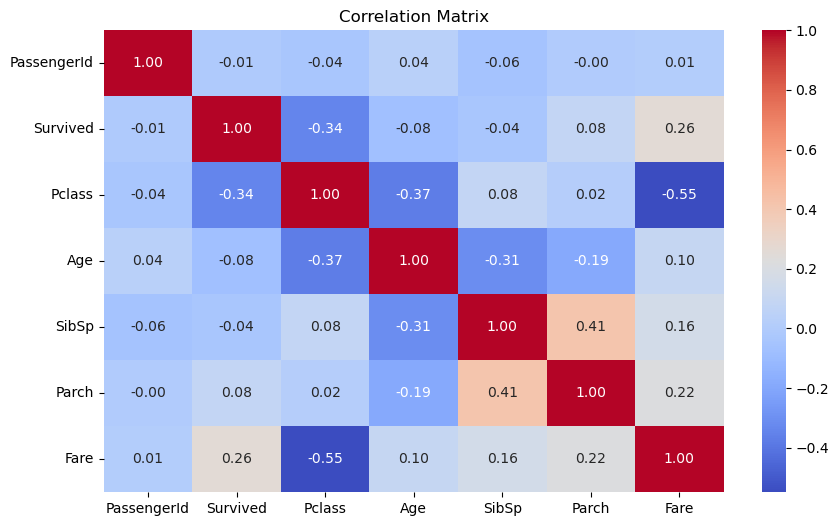

In [23]:
import seaborn as sns

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


✅ 4. Visualize Missing Values

<Axes: >

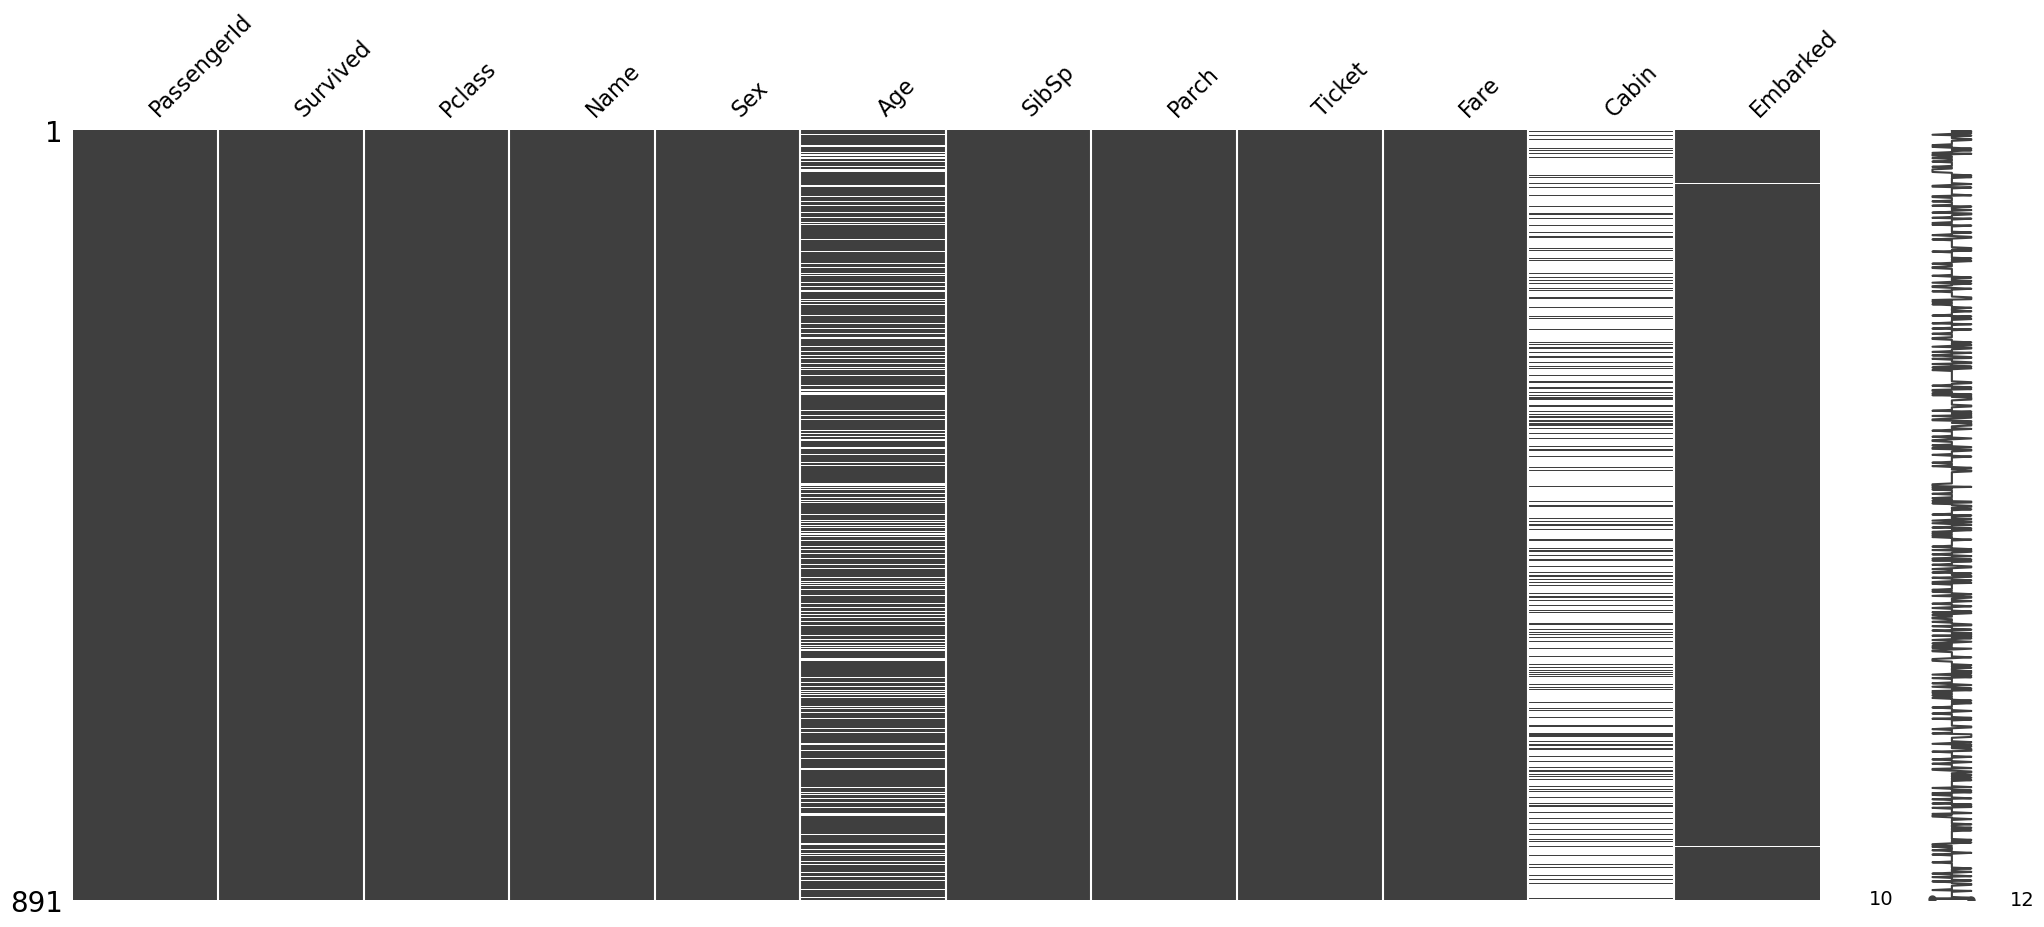

In [4]:
msno.matrix(df)

✅ 5. Automated Profiling Report

In [24]:
profile = ProfileReport(df, title="Titanic Data Profile Report", explorative=True)
profile.to_file("titanic_profile.html")


C:\Users\nithyalakshmim\AppData\Local\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: >

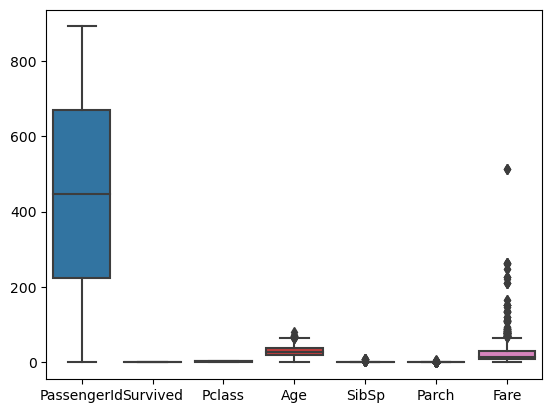

In [25]:
sns.boxplot(df) # identify outliers

<Axes: >

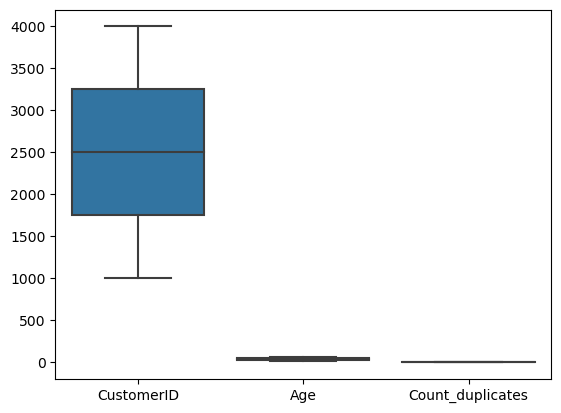

In [26]:
sns.boxplot(data=customer)

#### Hands = on

In [30]:
import pandas as pd
# Load CSV
customer = pd.read_csv('Customer_data.csv')

In [31]:
# Check for missing values
print("Missing Values:\n", customer.isnull().sum())

Missing Values:
 CustomerID            0
Name                 34
Email                 0
SignupDate           81
Country             422
Phone               137
Age                  51
Rowkey                0
Count_duplicates      0
dtype: int64


In [32]:
# Detect duplicates
print("\nDuplicate Rows:\n", customer[customer.duplicated()])


Duplicate Rows:
 Empty DataFrame
Columns: [CustomerID, Name, Email, SignupDate, Country, Phone, Age, Rowkey, Count_duplicates]
Index: []


In [33]:
# Standardize country names
customer['Country'] = customer['Country'].str.upper().str.replace('.', '',regex=False)

In [34]:
# Check inconsistent phone formats (non-numeric check)
customer['Phone_Numeric'] = customer['Phone'].str.replace(r'\D', '', regex=True)
customer['Phone_Valid'] = customer['Phone_Numeric'].str.len().between(10, 15)

In [35]:
# Check invalid ages
customer['Age_Valid'] = customer['Age'].between(0, 120)

In [36]:
# Invalid signupdate format check
customer['SignupDate_Valid'] = pd.to_datetime(customer['SignupDate'], errors='coerce')

In [37]:
# Print summary of issues
print("\nInvalid Phone Numbers:\n", customer[~customer['Phone_Valid']])
print("\nInvalid Age Entries:\n", customer[~customer['Age_Valid']])
print("\nInvalid Dates:\n", customer[~customer['SignupDate_Valid']])


Invalid Phone Numbers:
       CustomerID               Name                           Email  \
2           1003       Kevin Porter          nicholas89@hotmail.com   
6           1007         Karen Hess   jacqueline97@kline-mosley.com   
11          1012      Rebecca Irwin  urobinson@vazquez-gonzalez.biz   
21          1022       Lisa Shelton                 rcruz@gmail.com   
22          1023        Lynn Warren            chernandez@yahoo.com   
...          ...                ...                             ...   
2963        3964       Allison Soto         sheaelizabeth@yahoo.com   
2969        3970         Rebecca Le               holly72@lopez.com   
2976        3977  Mr. Marcus Clarke      william07@rivera-sharp.com   
2981        3982        Linda Welch         danielle87@figueroa.org   
2982        3983      Anthony Curry              cory85@kaufman.com   

      SignupDate Country                   Phone   Age  \
2     02-08-2024     USA  001-132-862-1029x86851  41.0   
6     

TypeError: bad operand type for unary ~: 'DatetimeArray'

In [ ]:
import pandas as pd

# Load data
df = pd.read_csv('Customer_data.csv')

# Convert data types where possible
df['SignupDate'] = pd.to_datetime(df['SignupDate'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Summary statistics for numerical data
print("Summary Statistics for Age:")
print(df['Age'].describe())

# Summary statistics for SignupDate
print("\nSignupDate Range:")
print(df['SignupDate'].min(), "to", df['SignupDate'].max())

# Country counts
print("\nCountry Distribution:")
print(df['Country'].value_counts())

# Anomaly detection: Check for negative ages or ages above 120
print("\nAnomalies in Age:")
print(df[(df['Age'] < 0) | (df['Age'] > 120)])

# Anomalies in SignupDate (missing or invalid dates)
print("\nAnomalies in SignupDate:")
print(df[df['SignupDate'].isnull()])

# Check for duplicate CustomerID
print("\nDuplicate CustomerID entries:")
print(df[df.duplicated(['CustomerID'], keep=False)])

# Detect unusual phone number patterns (non-digit characters count)
df['phone_digits'] = df['Phone'].str.replace(r'\D', '', regex=True).str.len()
print("\nPhone number digit count statistics:")
print(df['phone_digits'].describe())

# Phones with too few or too many digits
print("\nAnomalies in Phone digits:")
print(df[(df['phone_digits'] < 10) | (df['phone_digits'] > 15)])


In [ ]:
import pandas as pd

# Load data
df = pd.read_csv('Customer_data.csv')

# Known countries (case insensitive)
known_countries = ['USA', 'U.S.A', 'CAN', 'UK', 'AUS']

# Validation rules
df['Email_valid'] = df['Email'].str.contains('@', na=False)
df['Country_valid'] = df['Country'].str.upper().isin([c.upper() for c in known_countries])
df['Age_valid'] = df['Age'].between(18, 70)

# Combine all validation flags
df['Valid'] = df['Email_valid'] & df['Country_valid'] & df['Age_valid']

print("Validation Results:")
print(df[['CustomerID', 'Email', 'Country', 'Age', 'Email_valid', 'Country_valid', 'Age_valid', 'Valid']])
